In [2]:
# docker run -p 8888:8888 -v `pwd`:/home/jovyan/work -it jupyter/datascience-notebook

import math
import matplotlib.pyplot as plt
from scipy import integrate
import numpy as np
from scipy.special import betainc

In [10]:
def catastrophe_probability(t, period):  # t and period in Gy, period means half-life before catastrophe
  return 2**(-t/period)


def norm(x):
    # normalise x to range [0,1], e.g. norm(np.array([1, 2, 6])) = [0, 0.2, 1]
    if len(x) == 0:
        return x
    if x.min() == x.max():
        return np.zeros(len(x))
    nom = (x - x.min()) * 1.0
    denom = x.max() - x.min()
    return nom/denom


def sigmoid(x, k=1):
    # sigmoid function, use k to adjust the slope
    s = 1 / (1 + np.exp(-x / k))
    return s


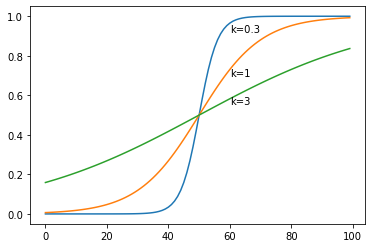

In [11]:
# how k works in sigmoid()
def draw_sigmoid(xs, k):
    indx = 60
    fix_position = 0.05
    ys = [sigmoid(x/10-5, k) for x in xs]
    plt.text(xs[indx], ys[indx]*(1-fix_position), f'{k=}')
    plt.plot(xs, ys)

xs = np.arange(0, 100, 1)
draw_sigmoid(xs, k=0.3)
draw_sigmoid(xs, k=1)
draw_sigmoid(xs, k=3)
plt.show()

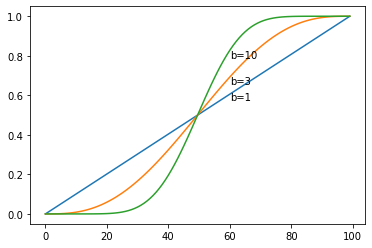

0.5124973964842103
8.509104732905517e-16


In [17]:
def sigmoid01(x, b=1):
    return betainc(b, b, x)
    
def draw_sigmoid01(xs, b=1):
    assert b >= 1
    indx = 60
    fix_position = 0.05
    k=100
    ys = [sigmoid01(x, b) for x in norm(xs)]  # sigmoid01(xs)
    plt.text(xs[indx], ys[indx]*(1-fix_position), f'{b=}')
    plt.plot(xs, ys)

xs = np.arange(0, 100, 1)
draw_sigmoid01(xs, b=1)
draw_sigmoid01(xs, b=3)
draw_sigmoid01(xs, b=10)
plt.show()

print(sigmoid(0.01, k=0.2))
print(sigmoid01(0.01, b=10))

In [18]:
def f(start_y, sigmoid_k, end_period):
  total_gy = max(40, start_y*2)
  dots_per_gy = 10
  xs = np.array([x/dots_per_gy for x in range(total_gy*dots_per_gy)])  # 0 to total_gy Gy
  ys = sigmoid(xs[:start_y*dots_per_gy*2]-start_y, k=sigmoid_k)
  ys = norm(ys)
  ys = np.concatenate((ys, np.ones((total_gy-start_y*2)*dots_per_gy)))
  if end_period:
    ys *= end_p(xs, end_period)
  i = len(ys)
  while ys[i-1] == 1:
    i -= 1
  return xs[:i], ys[:i]

In [19]:
def plot(a,b,c, w=1):
  xs, ys = f(a,b,c)
  s = ys[1:] - ys[:-1]
  s = s.clip(min=0)
  if True:
      xs2, ys2 = f(a,b,None)  # no catastrophes for width
      if ys2[-1] > 0.9:
        s2 = ys2[1:] - ys2[:-1]
        s2 = s2.clip(min=0)
      print('w', sum(s2[(a-w)*10:(a+w)*10])/sum(s2))
  print('earth', sum(s[:45])/sum(s), '6gy', sum(s[:60])/sum(s[:45]), '7gy', sum(s[:70])/sum(s[:45]), '8gy', sum(s[:80])/sum(s[:45]))
  plt.plot(xs, ys)
  plt.show()

w 0.6822644373685598
earth 0.0029181415203741305 6gy 11.803303393733744 7gy 54.44153430285289 8gy 171.34203974528387


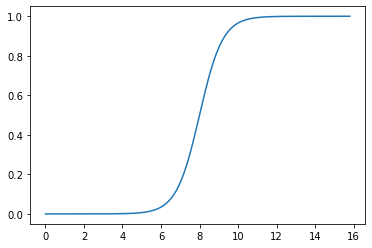

In [20]:
plot(8, 0.6, None)

In [22]:
def f01(start_y, sigmoid_b, end_period):
  total_gy = max(40, start_y*2)
  dots_per_gy = 10
  xs = np.array([x/dots_per_gy for x in range(total_gy*dots_per_gy)])  # 0 to total_gy Gy
  ys = sigmoid01(xs[:start_y*dots_per_gy*2]-start_y, b=sigmoid_b)
  ys = norm(ys)
  ys = np.concatenate((ys, np.ones((total_gy-start_y*2)*dots_per_gy)))
  if end_period:
    ys *= end_p(xs, end_period)
  i = len(ys)
  while ys[i-1] == 1:
    i -= 1
  return xs[:i], ys[:i]

def plot01(a,b,c, w=1):
  xs, ys = f(a,b,c)
  s = ys[1:] - ys[:-1]
  s = s.clip(min=0)
  if True:
      xs2, ys2 = f01(a,b,None)  # no catastrophes for width
      if ys2[-1] > 0.9:
        s2 = ys2[1:] - ys2[:-1]
        s2 = s2.clip(min=0)
      print('w', sum(s2[(a-w)*10:(a+w)*10])/sum(s2))
  print('earth', sum(s[:45])/sum(s), '6gy', sum(s[:60])/sum(s[:45]), '7gy', sum(s[:70])/sum(s[:45]), '8gy', sum(s[:80])/sum(s[:45]))
  plt.plot(xs, ys)
  plt.show()

w 0.1329901872999063
earth 0.2751381283973382 6gy 1.355888971304645 7gy 1.5963645399606214 8gy 1.8380434887754686


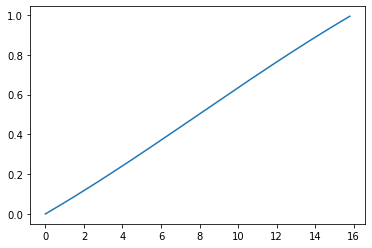

In [23]:
plot(8, 10, None)